**Overfitting Model**: Excess capacity (more parameters) in learning data.

**Training Error -> Decreases, Validation Error -> Increases**

Dataset: IMDB Movie Review Dataset

In [1]:
# import the necessary packages
from __future__ import absolute_import, division, print_function, unicode_literals
from matplotlib import pyplot as plt
import numpy as np
#!pip install tensorflow==2.1.0
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the dataset from keras package
NUM_WORDS=10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
print("Training entries: {}, Test entries: {}".format(len(train_data), len(test_data)))
print(train_data[:10])
print(train_labels[:10])

Training entries: 25000, Test entries: 25000
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1

In [3]:
# Create a function for Multi-hot Sequences
# Multihot encoding turns our list of words into a vector of 0's and 1's
# Set specific indices of results[i] is set to 1
def multi_hot_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices]=1.0
  return results

[0. 1. 1. ... 0. 0. 0.]


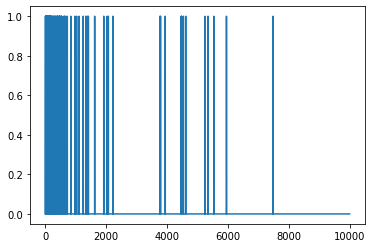

In [4]:
# 10000 dimension vector is created
# it is done to ensure that all the messages are of equal length
train_data = multi_hot_sequences(train_data, dimension = NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)
print(train_data[0])
plt.plot(train_data[0])

## Demonstrate Overfitting:

In [5]:
# Create a Standard baseline model
std_model = tf.keras.Sequential()
std_model.add(tf.keras.layers.Dense(16, activation='relu', input_shape = (NUM_WORDS,)))
#std_model.add(tf.keras.layers.Dense(16, activation='relu'))
std_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

std_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Set the optimizer and loss function to the model
std_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model for 10 epochs
std_history = std_model.fit(train_data, train_labels, epochs = 10, batch_size=512, validation_data=(test_data,test_labels), verbose=2)

Epoch 1/10
49/49 - 5s - loss: 0.4769 - accuracy: 0.8058 - val_loss: 0.3516 - val_accuracy: 0.8755 - 5s/epoch - 103ms/step
Epoch 2/10
49/49 - 1s - loss: 0.2724 - accuracy: 0.9076 - val_loss: 0.2969 - val_accuracy: 0.8872 - 1s/epoch - 22ms/step
Epoch 3/10
49/49 - 1s - loss: 0.2135 - accuracy: 0.9290 - val_loss: 0.2849 - val_accuracy: 0.8881 - 1s/epoch - 22ms/step
Epoch 4/10
49/49 - 1s - loss: 0.1799 - accuracy: 0.9404 - val_loss: 0.2850 - val_accuracy: 0.8857 - 1s/epoch - 22ms/step
Epoch 5/10
49/49 - 1s - loss: 0.1561 - accuracy: 0.9496 - val_loss: 0.2915 - val_accuracy: 0.8830 - 1s/epoch - 22ms/step
Epoch 6/10
49/49 - 1s - loss: 0.1380 - accuracy: 0.9560 - val_loss: 0.3018 - val_accuracy: 0.8790 - 1s/epoch - 22ms/step
Epoch 7/10
49/49 - 1s - loss: 0.1231 - accuracy: 0.9631 - val_loss: 0.3149 - val_accuracy: 0.8770 - 1s/epoch - 26ms/step
Epoch 8/10
49/49 - 1s - loss: 0.1113 - accuracy: 0.9668 - val_loss: 0.3267 - val_accuracy: 0.8746 - 1s/epoch - 28ms/step
Epoch 9/10
49/49 - 1s - loss: 0

## Create a Large Network

In [8]:
# Create a Large model
large_model = tf.keras.Sequential()
large_model.add(tf.keras.layers.Dense(50, activation='relu', input_shape = (NUM_WORDS,)))
#large_model.add(tf.keras.layers.Dense(100, activation='relu'))
large_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

large_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                500050    
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 500,101
Trainable params: 500,101
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Set the optimizer and loss function to the model
large_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

In [10]:
# Train the model for 10 epochs
large_history = large_model.fit(train_data, train_labels, epochs = 10, batch_size=512, validation_data=(test_data,test_labels), verbose=2)

Epoch 1/10
49/49 - 3s - loss: 0.4066 - accuracy: 0.8346 - binary_crossentropy: 0.4066 - val_loss: 0.2997 - val_accuracy: 0.8833 - val_binary_crossentropy: 0.2997 - 3s/epoch - 56ms/step
Epoch 2/10
49/49 - 1s - loss: 0.2192 - accuracy: 0.9221 - binary_crossentropy: 0.2192 - val_loss: 0.2828 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2828 - 1s/epoch - 22ms/step
Epoch 3/10
49/49 - 1s - loss: 0.1698 - accuracy: 0.9411 - binary_crossentropy: 0.1698 - val_loss: 0.2965 - val_accuracy: 0.8812 - val_binary_crossentropy: 0.2965 - 1s/epoch - 22ms/step
Epoch 4/10
49/49 - 1s - loss: 0.1431 - accuracy: 0.9526 - binary_crossentropy: 0.1431 - val_loss: 0.3104 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.3104 - 1s/epoch - 22ms/step
Epoch 5/10
49/49 - 2s - loss: 0.1198 - accuracy: 0.9618 - binary_crossentropy: 0.1198 - val_loss: 0.3349 - val_accuracy: 0.8737 - val_binary_crossentropy: 0.3349 - 2s/epoch - 31ms/step
Epoch 6/10
49/49 - 1s - loss: 0.1033 - accuracy: 0.9678 - binary_crossentro

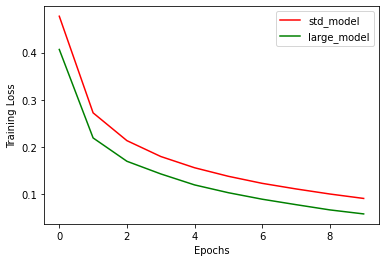

In [11]:
# Plot the models
plt.plot(std_history.history['loss'], 'r', large_history.history['loss'], 'g')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['std_model','large_model'])
plt.show()

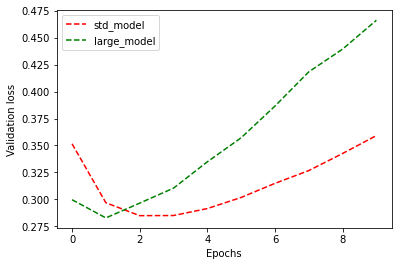

In [12]:
# Plot the models
plt.plot(std_history.history['val_loss'], 'r--', large_history.history['val_loss'], 'g--')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(['std_model','large_model'])
plt.show()

## Stratergies to prevent Overfitting by Models:

1. Get more data to minimize the overfitting by Models
2. Add weight regularization:

  i. **L1 Regularization:** The cost is added proportional to the absolute value of the weight coefficients (L1 norm of the weights).

  ii. **L2 Regularization:** The cost is added proportional to the square of the value of the weight coefficients (Squared L2 Norm of the weights). Example: **l2(0.001)** = 0.001 * weight_coefficient_value ** 2, where regularization rate = 0.001.

3. Add a dropout layer to the model:

 *   Randomly "Dropping out" a number of output features in a layer during training process.
 *   The vector elements (few) will be replaced by 0 after a dropout condition.
 *   The dropout value is usually set between 0.2 to 0.5 (20% to 50%).
 *   At Test time, no units are dropped out. Instead, the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active during the training process.





### Add L2 Regularization to the model:

In [13]:
# Create a L2 reqularized Large model
# Regularization rate = 0.001
l2_model = tf.keras.Sequential()
l2_model.add(tf.keras.layers.Dense(50, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape = (NUM_WORDS,)))
#l2_model.add(tf.keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
l2_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

l2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                500050    
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 500,101
Trainable params: 500,101
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Set the optimizer and loss function to the model
l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

In [15]:
# Train the model for 10 epochs
l2_model_history = l2_model.fit(train_data, train_labels, epochs = 10, batch_size=512, validation_data=(test_data,test_labels), verbose=2)

Epoch 1/10
49/49 - 4s - loss: 0.4737 - accuracy: 0.8374 - binary_crossentropy: 0.4050 - val_loss: 0.3752 - val_accuracy: 0.8749 - val_binary_crossentropy: 0.3144 - 4s/epoch - 72ms/step
Epoch 2/10
49/49 - 1s - loss: 0.3000 - accuracy: 0.9140 - binary_crossentropy: 0.2405 - val_loss: 0.3428 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2852 - 1s/epoch - 23ms/step
Epoch 3/10
49/49 - 1s - loss: 0.2677 - accuracy: 0.9262 - binary_crossentropy: 0.2102 - val_loss: 0.3445 - val_accuracy: 0.8826 - val_binary_crossentropy: 0.2878 - 1s/epoch - 21ms/step
Epoch 4/10
49/49 - 1s - loss: 0.2561 - accuracy: 0.9306 - binary_crossentropy: 0.1984 - val_loss: 0.3443 - val_accuracy: 0.8835 - val_binary_crossentropy: 0.2869 - 1s/epoch - 23ms/step
Epoch 5/10
49/49 - 1s - loss: 0.2463 - accuracy: 0.9343 - binary_crossentropy: 0.1881 - val_loss: 0.3471 - val_accuracy: 0.8819 - val_binary_crossentropy: 0.2896 - 1s/epoch - 22ms/step
Epoch 6/10
49/49 - 2s - loss: 0.2398 - accuracy: 0.9363 - binary_crossentro

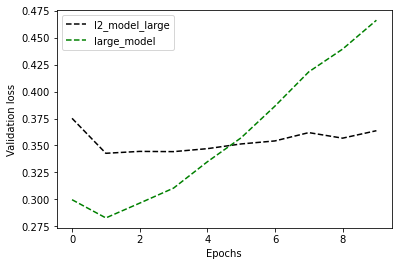

In [16]:
# Plot the models
plt.plot(l2_model_history.history['val_loss'], 'k--', large_history.history['val_loss'], 'g--')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(['l2_model_large','large_model'])
plt.show()